## Árboles de Regresión

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("../datasets/boston/Boston.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
data.shape

(506, 14)

In [4]:
colnames = data.columns.values.tolist()
predictors = colnames[:13]
target = colnames[13]
X = data[predictors]
Y = data[target]

In [5]:
from sklearn.tree import DecisionTreeRegressor

In [6]:
regtree = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, random_state=0)

In [7]:
regtree.fit(X,Y)

DecisionTreeRegressor(min_samples_leaf=10, min_samples_split=30, random_state=0)

In [8]:
preds = regtree.predict(data[predictors])

In [9]:
data["preds"] = preds

In [10]:
data[["preds", "medv"]]

,preds,medv
0,22.840000,24.0
1,22.840000,21.6
2,35.247826,34.7
3,35.247826,33.4
4,35.247826,36.2
...,...,...
501,22.840000,22.4
502,20.624138,20.6
503,28.978261,23.9
504,31.170000,22.0


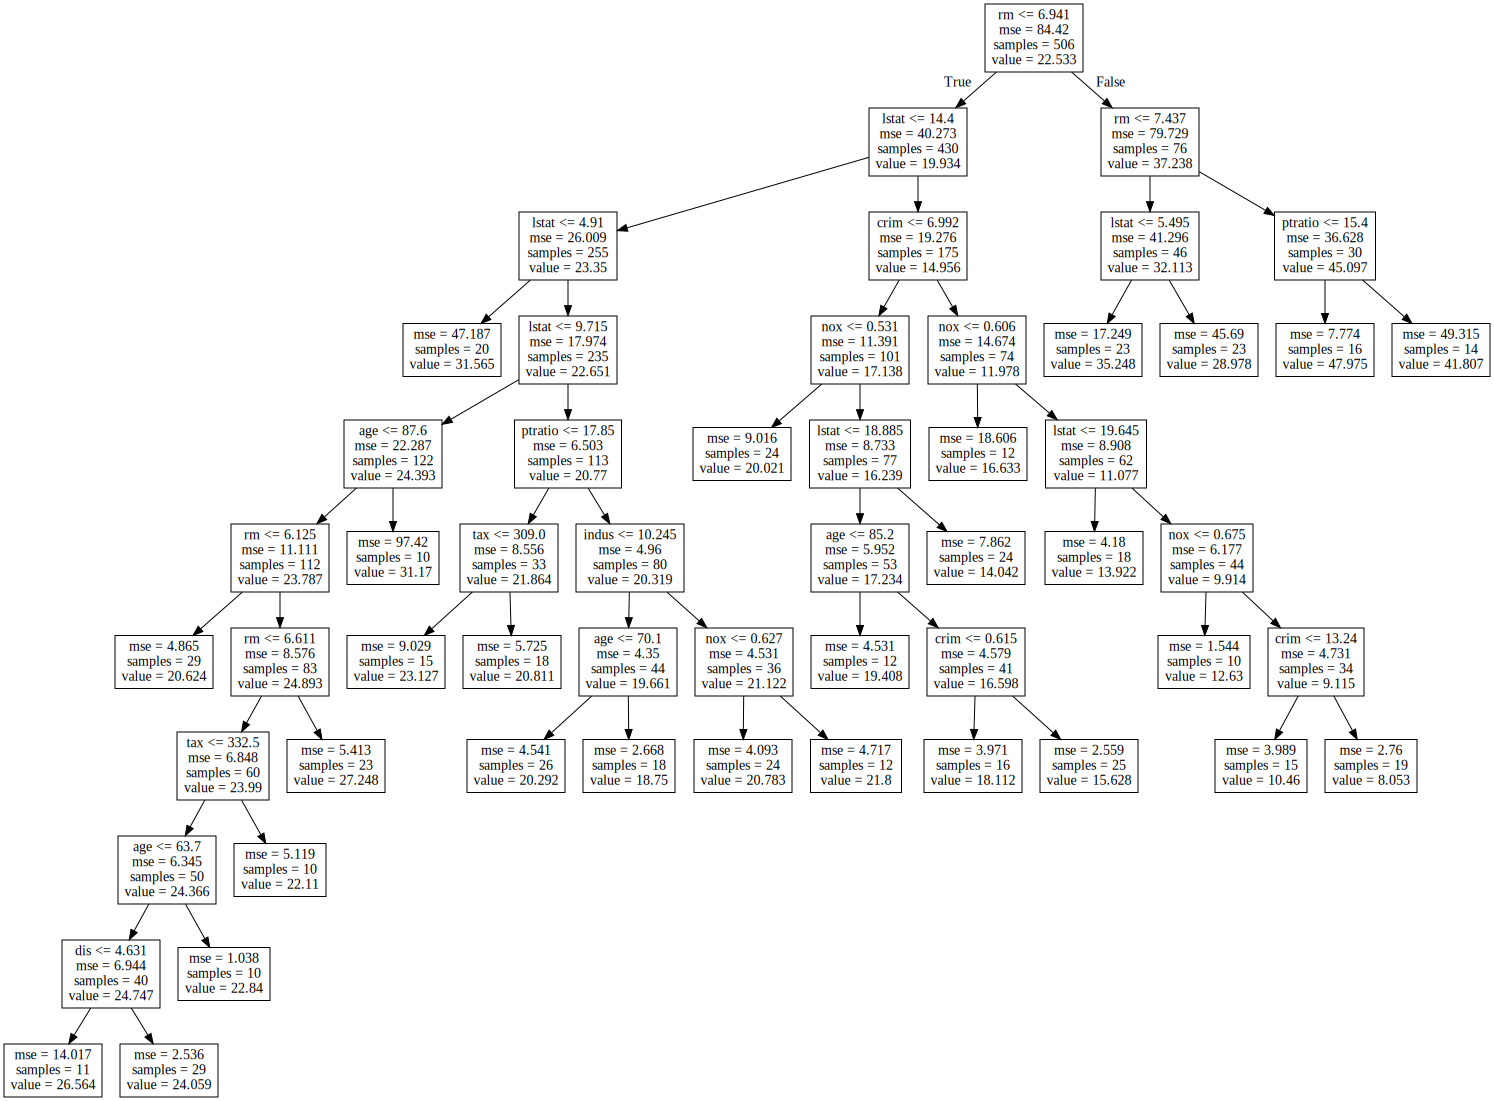

In [12]:
from sklearn.tree import export_graphviz
with open("C:/Users/Jhon/Documents/Python Scripts/python-ml/notebooks/resources/boston_rtree.dot", "w") as dotfile:
    export_graphviz(regtree, out_file=dotfile, feature_names=predictors)
    dotfile.close()
import os
from graphviz import Source
file = open("C:/Users/Jhon/Documents/Python Scripts/python-ml/notebooks/resources/boston_rtree.dot", "r")
text = file.read()
Source(text)

In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

In [17]:
cv = KFold(n_splits = 10, shuffle=True, random_state=1)
cv.get_n_splits(X)
scores = cross_val_score(regtree, X, Y, scoring=make_scorer(mean_squared_error), cv = cv, n_jobs=1)
print(scores)
score = np.mean(scores)
print(score)

[13.64925886 17.28987161 16.98569707 47.56954086  9.26202865 17.23057023
 15.41541493 31.33011027 22.79877067  9.54180723]
20.107307036443846


In [18]:
list(zip(predictors,regtree.feature_importances_))

[('crim', 0.03421203230639308),
 ('zn', 0.0),
 ('indus', 0.0011605887788380146),
 ('chas', 0.0),
 ('nox', 0.01856163073811432),
 ('rm', 0.6308568014337028),
 ('age', 0.01725115143448847),
 ('dis', 0.0013745115995791378),
 ('rad', 0.0),
 ('tax', 0.0023698305298803803),
 ('ptratio', 0.009333247332530954),
 ('black', 0.0),
 ('lstat', 0.28488020584647283)]

## Random Forests

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
forest = RandomForestRegressor(n_jobs=2, oob_score=True, n_estimators=700)
forest.fit(X,Y)

RandomForestRegressor(n_estimators=700, n_jobs=2, oob_score=True)

In [26]:
data["rforest_pred"] = forest.oob_prediction_
data[["rforest_pred", "medv"]]

,rforest_pred,medv
0,28.023552,24.0
1,22.687449,21.6
2,34.560317,34.7
3,34.781967,33.4
4,34.247445,36.2
...,...,...
501,24.659843,22.4
502,18.802991,20.6
503,26.815726,23.9
504,25.951600,22.0


In [27]:
data["rforest_error2"] = (data["rforest_pred"]-data["medv"])**2
sum(data["rforest_error2"])/len(data)

10.284878978571967

In [28]:
forest.oob_score_

0.8781694734387582